In [79]:
import numpy as np  
import pandas as pd  
import re  
import nltk  
import matplotlib.pyplot as plt  
import seaborn as sns
# Importing modules
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 're', 'edu', 'use', 'one', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'think', 'see', 'rather', 'make', 'seem', 'run', 'need', 'even', 'also', 'may', 'take', 'come','doha','istanbul','dubai','sydney','manchester','turkish','cape_town','Airline','airline','etihad','qatar_airway','qatar','emirate','moscow','amsterdam','tashkent','amman','abu','dhabi','air','gulf','london','singapore','kuwait','kuala','lumpur','oman','airway','airways','emirates','via','sharjah','told','bangkok','son','happen','afghanistan', 'albania','algeria','andorra','angola','argentina','austria','australia','azerbaijan','bahrain','bangladesh','barbodas','belarus','armenia','anguilla','belgium','benin','brazil','brunei','cameroon','canada','bulgaria','chad','chile','bolivia','china','colombia','cuba','cyprus','denmark','dominica','ecuador','egypt','el salvador','eritrea','estonia','fiji','finland','france','gabon','gambia','georgia','ghana','greece','grenada','guam','guatemala','guinea','haiti','honduras','iceland','india','indonesia','iran','iraq','israel','italy','jamaica','japan','jersey','jordan','kazakhstan','kenya','kiribati','kosovo','kyrgyzstan','laos','latvia','lebanon','liberia','luxembourg','macedonia','malawi','malysia','maldives','mali','malta','mexico','moldova','monaco','mongolia','myanmar','namibia','netherlands','new zealand','nicaragua','niger','niue','north korea','united kingdom','oman','pakistan','palau','palestine','panama','paraguay','peru','ploland','portugal','romania','russia','rwanda','philippines','serbia','senegal','singapore','slovakia','somalia','south africa','spain','sudan','sweden','switzerland','syria','tanzania','thailand','togo','tonga','tunisia','turkmenistan','uganda','ukraine','uruguay','united states','vietnam','wales','yemen','zambia','zimbabwe','kabul','tirana','algires','luanda','yerevan','canberra','baku','manama','dhaka','minsk','manama','vienna','bridgetown','brussels','hamilton','gaborone','sofia','ottawa','torento','bangui','beijing','zagreb','roseau','dili','santiago','cairo','paris','suva','addis ababa','berlin','germany','georgia','gabon','ghana','athens','libreville','cayenne','helsinki','conakry','tehran','douglas','rome','tokyo','jakarta','amman','nairobi','pristina','riga,''kula lumpur','tarawa','windhoek','abuja','niamey','amesterdam','kathmandu','nepal','nicosia','oslo','jerusalem','lima','warsaw','lisbon','taipei','islamabad','belfast','bucharest','marigot','san marino','belgrade','freetown','bratislava','hamburg','seoul','stockholm','damascus','khartoum','tunis','kiev','carcas','lusaka','harare','london','washington','los angeles','lusaka','tashkent','ashgabat','johannesburg','however','flydubai','saudi','arabia','arabian','jfk','dublin','december','februry','january','march','november','april','september','october','august','july','june','may','bad','nightmare','able','pre','new_york','copenhagen','beirut','auh','usa','europe','euro','next','never','ever','new','find','pm','wrong','still','la','bad','good','well','terrible','awful','chicago','wife','give','almost','especially','always','lot','end','special','usd','mess','sure','superb','flight','excellent','enough','thank','really','already','royal_jordanian','instead','montreal','ataturk','manila','everything','finally','due','must','else','yet','didna','guy''boston','turkey','york','mumbai','tashkand','gatwick','qsuite','houston','heathrow','horrible','great','due','muscat','munich','ba','european','melbourne','lufthansa','birmangham','boston','colombo','indian','cana','madrid','saudia','jeddah','asian','rude','pleasant','shame','polite','positive','dec','fly','suppose','rd','izmir','perfect','et','pas','annoying','vol','flying','mostly','delhi','ist','lhr','perth','medina','mohamm','hk','divya','aqaba','downhill','hurghada','catania','kigali','tk','mar','venice','trabzon','milano','prishtina','algier','khi','basel','hanoi','miami','cappadocia','valencia','odessa','dalaman','seychelle','atltnta','havana','aqaba','sharm','sheikh','malaga','dubrovnik','caracas','san_francisco','bidv','bcn','odessa','kinshasa','salzburg','ita','auckland','ey','fa','gf','utter_chaos','dona','budap','mnl','bhr','rj','uae','atyrau','sao_paulo','qanta','lin','detroit','bangalore','ljubljana','irov','prague','karachi','doesna','lahore','kilaminjaro','tbilisi','alexandria','long_haul','antalya','ercan','almasria','toronto','liam','madinah','frankfurt','abidjan','australian','skopje','bkk','hkg','erbil','kochi','skopje','hong_kong','newcastle','glasgow','kayseri','eihada','sulaymaniyah','american','dusseldorf','adis_ababa','los_angele','mauritius','birmingham','durban','brisbane','klm','cochin','geneva','ihe','riyadh','cdg','leipzig','orlando','prague','almaty','bogota','merhaba','sa','bishkek','aira','tif','vilnius','belgrad','hamad','dohaa','txl','qr','odessa','entebbe','ordu','giresun','british','guangzho','mct','nov','gla','rio','marseille','istambul','jqb','ho_chi_minh','osaka','cluj','napoca','cebu','kyiv','paulo','pisa','february','lefkosa','chennai','adelaide','kolkata','sabiha','cph','sjj','juba','shiraz','italian','bhx','casblanca','narita','amm','lgw','gokcan','tblisi','sarajevo','dxb','cai','ad','cgk','bcn','ruh','fz','chi-minh','milan','fco','cph','han','bru','kansai','stuttgart','ahd','kathamandu','yyz','jff','jfd','jnb','africa','larnaca','cdg','ey','ek','cpt','ica','phl','zurich','kul','ath','malysian','bwl','aqj','vnukovo','doh','south_african','bilbao','algier','shanghai','hbe','yrs','panama','klia','vie','bkk','xma','etihad','hnd','alitalia','mashad','cluj','lr','edinburgh','uae','bangalore','jan','syd','bne','sao','lhe','addic','rostov','mu','cm','icn','guangzhou','goa','khalid','pgs','sri_lanka','rjs','addis','dc','ankara','aug','lh','dfw','ryanair','ice','atlanta','ababa','asia','bahourain','cathay','damman','che','mon','thy','couldna','thata','Å“tva','vent','panamaÆ’a','pvg','daÂ¼sseldorf','Å“fly','meddle_east','av','er','cx','sgn','krt','kwi','gcc','fr','sia','lb','bud','fs','ams','lcc','sfo','aÂ½','mombasa','eur','lax','ia','iah','saa','saas','nrt','spa','changi','nbo','ovo','jed','qa','eve','eva','rep','sn','eg','vce','blr','boe','cip','pjs','int','gamba','whiz','boeing','saturday','rob','biz','dh','mb','intl','pe','fra','mile','year','generally','nyc','dus','st','co','ab','isb','hajj','barely','anymore','nice','complete','rgn','rng','ed','cgd','bbc','akl','andando','volrhona','anything','nz','kin','iffy','back','drop','ssss','tgs','airlines','Airlines','A380','flights'])
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import pandas as pd
import os
os.chdir('..')
%matplotlib inline

In [80]:
df=pd.read_csv('C:\\Users\\Win 1809 UEFI\\Desktop\\999.csv') 


In [81]:
df.head(1)  

,airline,airline rank,review_date,Type_Of_Traveller,seat_type,Seat_Comfort,Cabin_Staff,Food_Beverages,Inflight_Entertainment,Ground_Service,...,airline_sentiment,Sentiment,Recommended,overall_rating,title,review,pos,neg,neu,comp
0,Saudi Arabian,4,2015,Family Leisure,Economy Class,4.0,3.0,1.0,NaN,4.0,...,Neutral,0.2023,1,6,poor inflight meal,Saudi Arabian Airlines flight from Medina to R...,0.101,0.088,0.811,0.2023


In [82]:
plot_size = plt.rcParams["figure.figsize"]  
plot_size[0] = 8 
plot_size[1] = 8 
plt.rcParams["figure.figsize"] = plot_size  

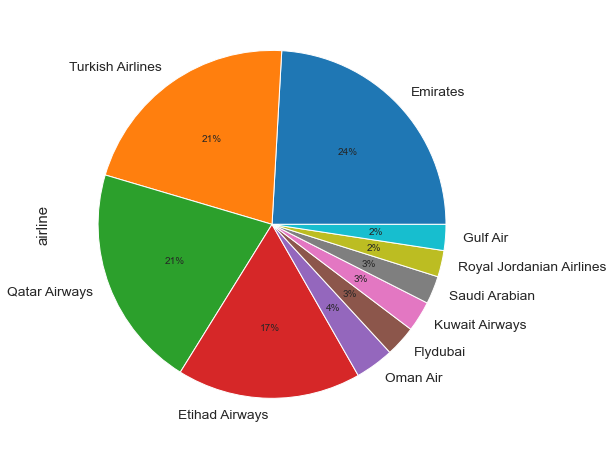

In [83]:
df.airline.value_counts().plot(kind='pie', autopct='%1.0f%%',)  

In [84]:
def show_pie_chart(data,airline):
    labels = ["Positive","Negative","Neutral"]
    sizes = [len(data[data.airline_sentiment=="Positive"])/len(data)*100,len(data[data.airline_sentiment=="Negative"])/len(data)*100,len(data[data.airline_sentiment=="Neutral"])/len(data)*100]
    explode = (0, 0.1, 0)  
    fig1, ax1 = plt.subplots()
    plt.pie(sizes, autopct='%1.1f%%',shadow=True,startangle=True, explode=explode)
    plt.tight_layout()
    plt.suptitle(airline +" pie chart",fontsize=12)
    ax1.legend(labels,bbox_to_anchor=(0.6, 0.2, 0.7, 0.5))
    plt.show()

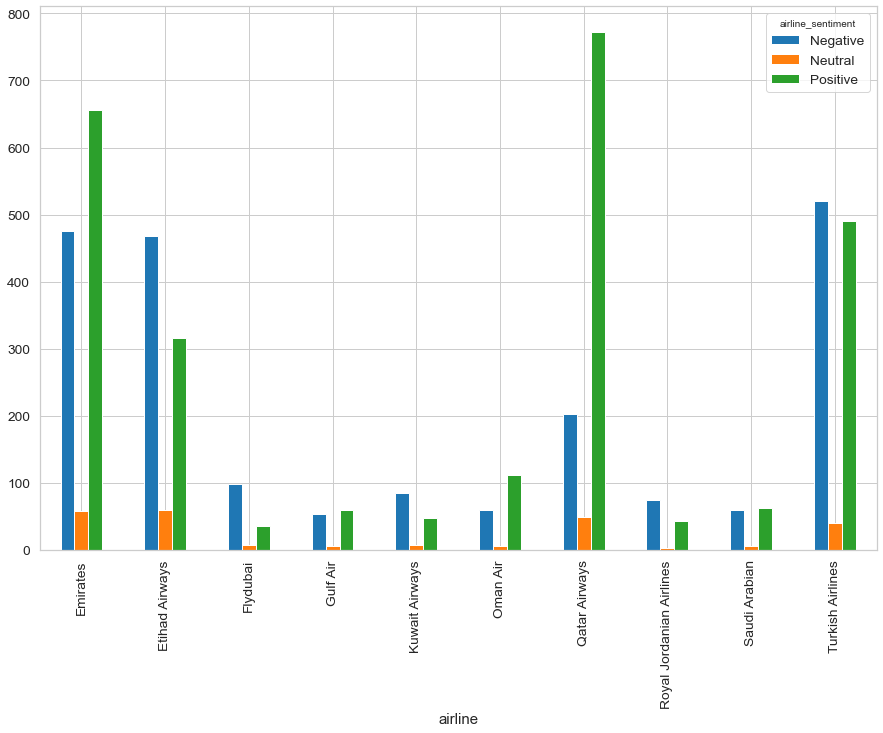

In [85]:
plot_size = plt.rcParams["figure.figsize"]  
plot_size[0] = 15  
plot_size[1] = 10  
plt.rcParams["figure.figsize"] = plot_size  
airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()  
airline_sentiment.plot(kind='bar')  

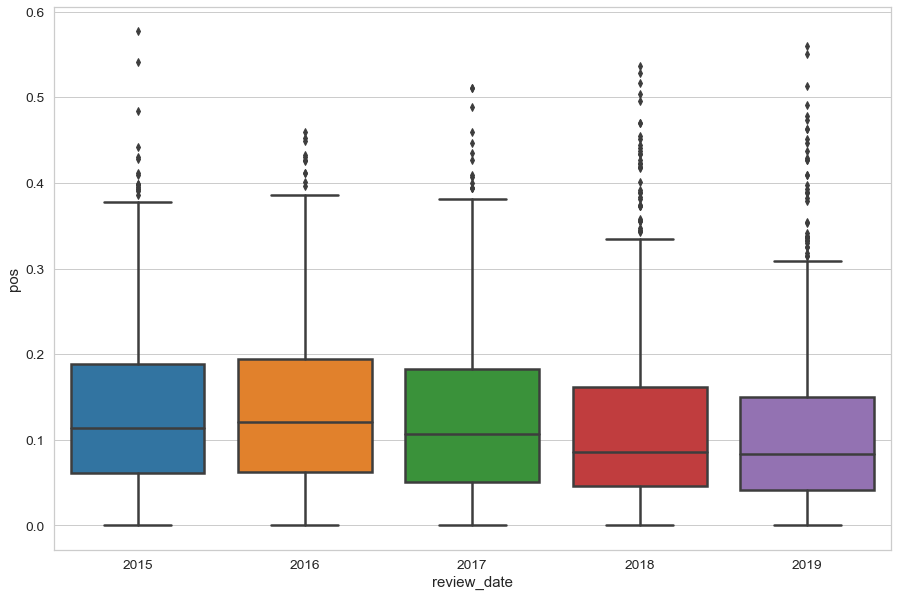

In [86]:
sns.boxplot(y=df['pos'], x=df['review_date'])

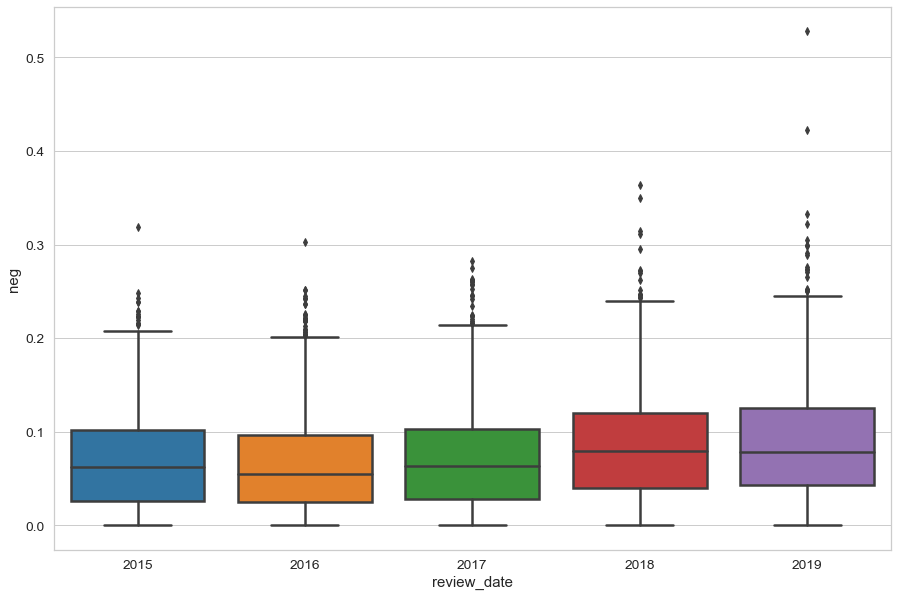

In [87]:
sns.boxplot(y=df['neg'], x=df['review_date'])

[]

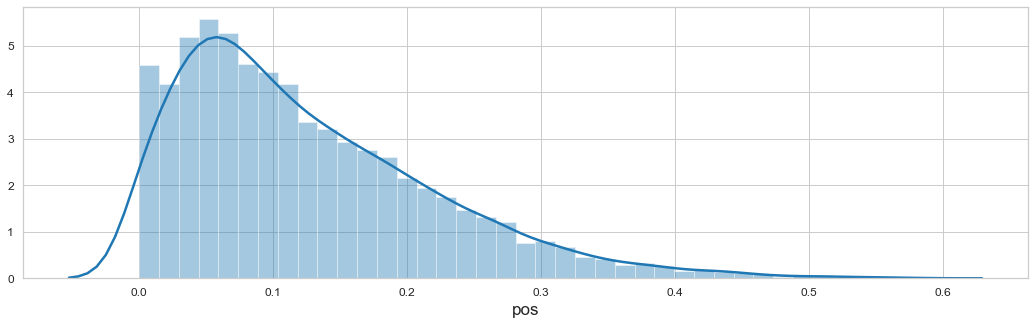

In [88]:
x = df["pos"].fillna(-1)

figsize=(18, 5)

ticksize = 12
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)
sns.distplot(x)
plt.plot()

[]

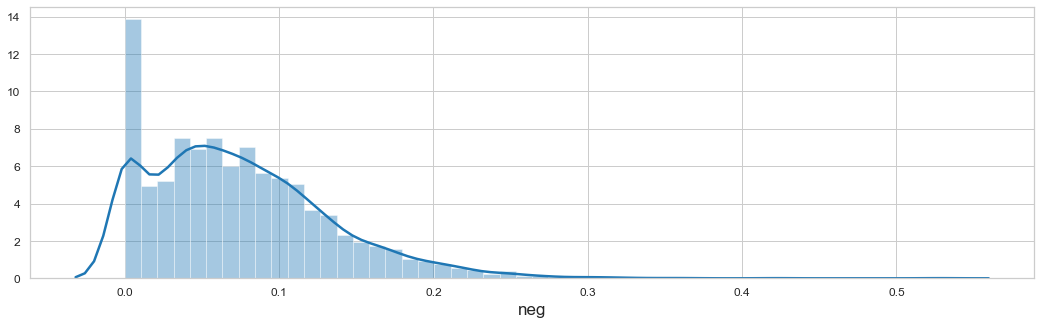

In [89]:
x = df["neg"].fillna(-1)

figsize=(18, 5)

ticksize = 12
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)
sns.distplot(x)
plt.plot()

In [90]:
plot_size = plt.rcParams["figure.figsize"]  
plot_size[0] = 8  
plot_size[1] = 8  
plt.rcParams["figure.figsize"] = plot_size

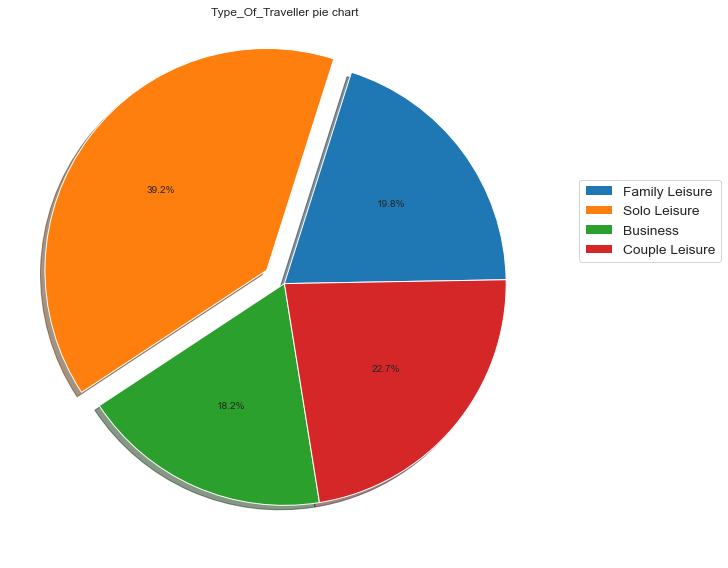

In [91]:
def show_pie_chart(data,airline):
    labels = ["Family Leisure","Solo Leisure","Business","Couple Leisure"]
    sizes = [len(data[data.Type_Of_Traveller=="Family Leisure"])/len(data)*100,len(data[data.Type_Of_Traveller=="Solo Leisure"])/len(data)*100,len(data[data.Type_Of_Traveller=="Business"])/len(data)*100,len(data[data.Type_Of_Traveller=="Couple Leisure"])/len(data)*100]
    explode = (0,0.1, 0,0)  
    fig1, ax1 = plt.subplots()
    plt.pie(sizes, autopct='%1.1f%%',shadow=True,startangle=True, explode=explode)
    plt.tight_layout()
    plt.suptitle(airline +" pie chart",fontsize=12)
    ax1.legend(labels,bbox_to_anchor=(0.6, 0.2, 0.7, 0.5))
    plt.show()
show_pie_chart(df,"Type_Of_Traveller")

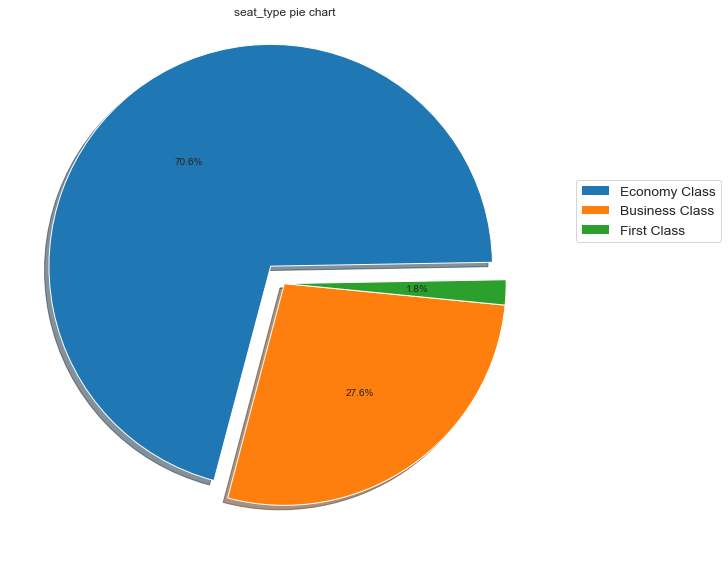

In [92]:
def show_pie_chart(data,airline):
    labels = ["Economy Class","Business Class","First Class"]
    sizes = [len(data[data.seat_type=="Economy Class"])/len(data)*100,len(data[data.seat_type=="Business Class"])/len(data)*100,len(data[data.seat_type=="First Class"])/len(data)*100]
    explode = (0.1, 0, 0,)
    fig1, ax1 = plt.subplots()
    plt.pie(sizes, autopct='%1.1f%%',shadow=True,startangle=True, explode=explode)
    plt.tight_layout()
    plt.suptitle(airline +" pie chart",fontsize=12)
    ax1.legend(labels,bbox_to_anchor=(0.6,0.2,0.7, 0.5))
    plt.show()
show_pie_chart(df,"seat_type")


In [93]:
import re
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df.review.values.tolist()
data_words = list(sent_to_words(data))

In [66]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the ge

In [69]:
data_ready

[['hour',
  'late',
  'poor',
  'inflight',
  'meal',
  'domestic',
  'seat',
  'comfortable',
  'sit',
  'nap',
  'crew',
  'helpful',
  'aircraft',
  'ife',
  'system'],
 ['regularly',
  'first',
  'time',
  'apprehensive',
  'press',
  'receive',
  'aircraft',
  'little',
  'aged',
  'clean',
  'maintain',
  'comfortable',
  'time',
  'departure',
  'arrival',
  'online',
  'check',
  'smooth',
  'issue',
  'board',
  'little',
  'slow',
  'overly',
  'laden',
  'passenger',
  'fault',
  'cabin',
  'crew',
  'crew',
  'attentive',
  'full',
  'meal',
  'service',
  'hour',
  'economy',
  'seat',
  'comfortable',
  'breakfast',
  'omelette',
  'mushroom',
  'caremelis',
  'onion',
  'edible',
  'produce',
  'righteous',
  'omelette',
  'economy',
  'class',
  'breakfast',
  'pass',
  'economy',
  'seat',
  'comfortable',
  'faux',
  'leather',
  'pitch',
  'way',
  'better',
  'toilet',
  'prior',
  'land',
  'clean',
  'tidy',
  'certainly',
  'sector'],
 ['economy',
  'class',
  'c

In [70]:
f=pd.DataFrame(data_ready)

In [72]:
f

,0,1,2,3,4,5,6,7,8,9,...,313,314,315,316,317,318,319,320,321,322
0,hour,late,poor,inflight,meal,domestic,seat,comfortable,sit,nap,...,None,None,None,None,None,None,None,None,None,None
1,regularly,first,time,apprehensive,press,receive,aircraft,little,aged,clean,...,None,None,None,None,None,None,None,None,None,None
2,economy,class,connect,transfer,process,virtually,nonexistent,poorly,organize,clearly,...,None,None,None,None,None,None,None,None,None,None
3,surprise,plane,time,cabin,crew,deliver,service,way,smile,plane,...,None,None,None,None,None,None,None,None,None,None
4,last,time,clean,rubbish,cabin,tidy,condition,old,screen,look,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,hour,descending,announce,land,head,account,fog,mean,hour,wait,...,None,None,None,None,None,None,None,None,None,None
4928,depart,late,recover,cumulate,mode,delay,cabin,crew,careless,connect,...,None,None,None,None,None,None,None,None,None,None
4929,delay,delay,delay,sum,experience,long,queue,check,desk,slow,...,None,None,None,None,None,None,None,None,None,None
4930,cancel,connect,ticket,office,finalise,pay,seat,people,seat,allocate,...,None,None,None,None,None,None,None,None,None,None


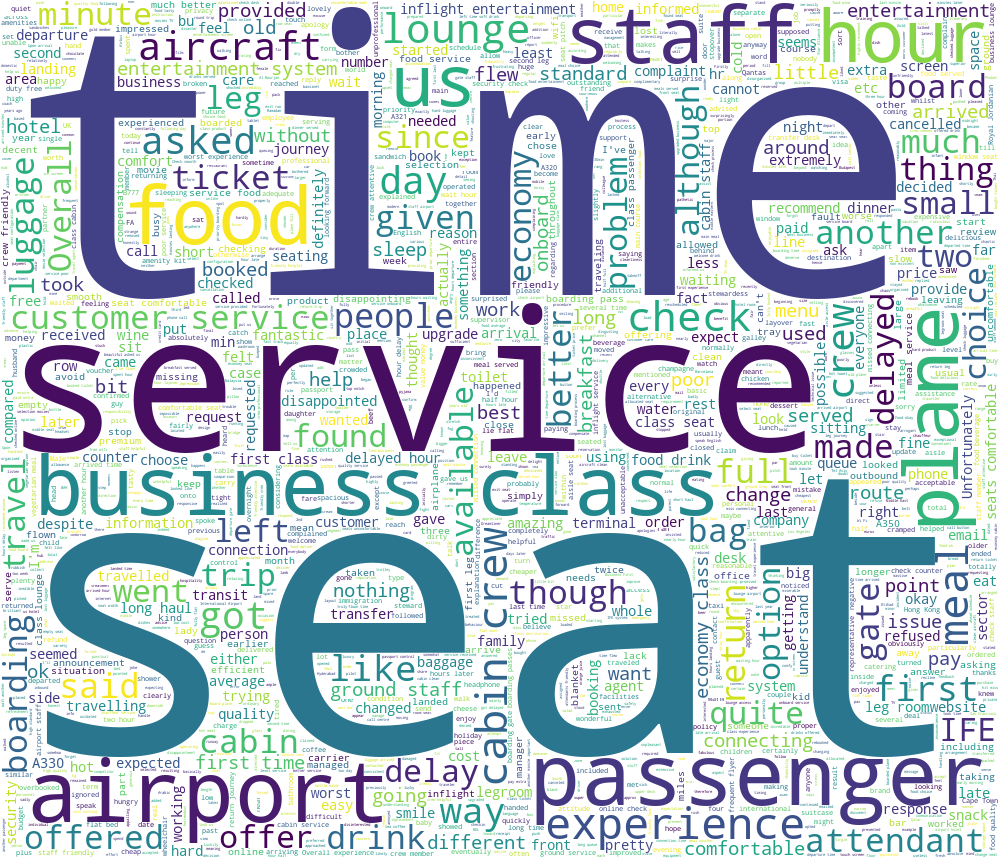

In [95]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white",width=1000, height=860, max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

C:\Users\Win 1809 UEFI\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a380', 'angeles', 'aâ½', 'chi', 'daâ¼sseldorf', 'el', 'kingdom', 'korea', 'kula', 'los', 'marino', 'minh', 'north', 'panamaæ', 'riga', 'salvador', 'san', 'south', 'states', 'tva', 'united', 'zealand'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


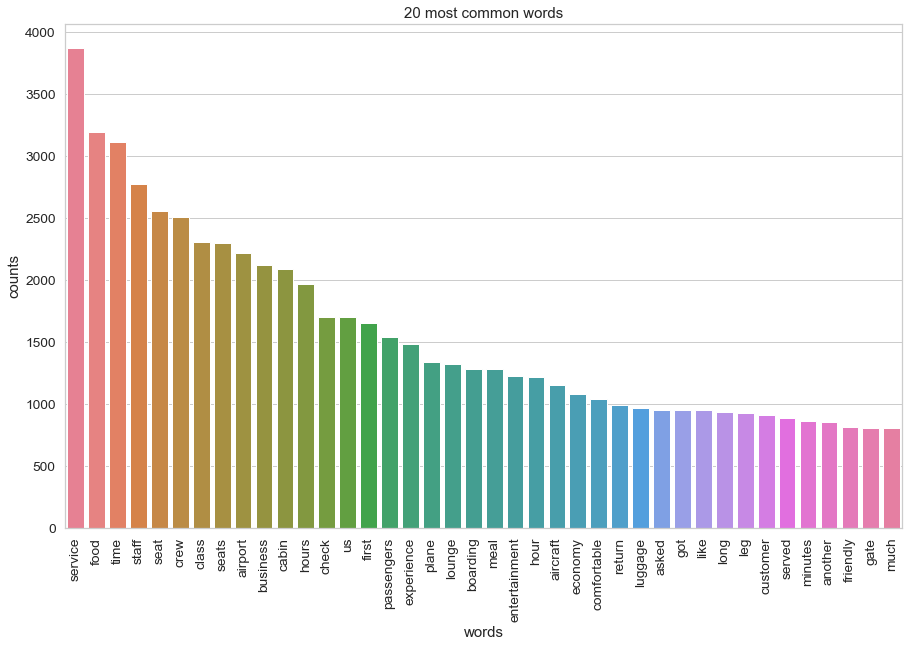

In [97]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stop_words)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['review'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)